In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
lines=np.loadtxt('data/USA_Housing.csv', delimiter=',', dtype='str')

print("Input")
for i in range(lines.shape[1]-1):
    print(lines[0, i])
    
    
print("Labels")
print(lines[0,-1])

Input
Avg. Area Income
Avg. Area House Age
Avg. Area Number of Rooms
Avg. Area Number of Bedrooms
Area Population
Labels
Price


In [6]:

x_total = lines[1:, :5].astype('float')
y_total = lines[1:, 5:].astype('float').flatten()

In [7]:
x_total = preprocessing.scale(x_total)
y_total = preprocessing.scale(y_total)

x_train = x_total[:4000]
x_test = x_total[4000:]
y_train = y_total[:4000]
y_test = y_total[4000:]

print('Train set size: ', x_train.shape[0])
print('Test set size', x_test.shape[0])

Train set size:  4000
Test set size 1000


### Normal Equation

In [8]:
X_train = np.hstack([x_train, np.ones((x_train.shape[0], 1))])
NE_solution = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X_train), X_train)), np.transpose(X_train)), y_train.reshape([-1, 1]))
print(NE_solution)

X_test = np.hstack([x_test, np.ones((x_test.shape[0], 1))])
y_pred_test = np.dot(X_test, NE_solution).flatten()

rmse_loss = np.sqrt(np.square(y_test - y_pred_test).mean())
print('rmse_loss:', rmse_loss)

[[0.65361133]
 [0.46378742]
 [0.34520317]
 [0.00353179]
 [0.42506886]
 [0.00270682]]
rmse_loss: 0.28904225054224564


### Sklearn module

In [9]:
from sklearn import linear_model

linreg = linear_model.LinearRegression()
linreg.fit(x_train, y_train)
print(linreg.coef_)
print(linreg.intercept_)
y_pred_test = linreg.predict(x_test)

rmse_loss = np.sqrt(np.square(y_test - y_pred_test).mean())
print('rmse_loss:', rmse_loss)

[0.65361133 0.46378742 0.34520317 0.00353179 0.42506886]
0.0027068226957548706
rmse_loss: 0.2890422505422456


### Gradient Descent

In [10]:
def shuffle_aligned_list(data):    
    num = data[0].shape[0]
    shuffle_index = np.random.permutation(num)
    return [d[shuffle_index] for d in data]

def batch_generator(data, batch_size, shuffle=True):
    batch_count = 0
    while True:
        if batch_count * batch_size + batch_size >= data[0].shape[0]:
            batch_count = 0
            if shuffle:
                data = shuffle_aligned_list(data)
        start = batch_count * batch_size
        end = start + batch_size
        batch_count += 1
        yield [d[start:end] for d in data]

### Training

weight: [0.65099761 0.46219012 0.33801997 0.01077995 0.42683162 0.00206267]
rmse_loss: 0.28878914008243806


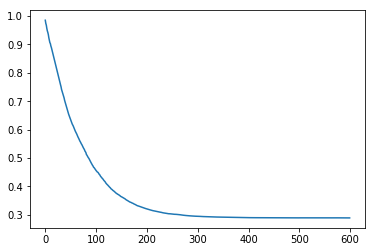

In [11]:
num_steps = 600
learning_rate = 0.01
batch_size = 40

weight = np.zeros(6)
np.random.seed(0)
batch_g = batch_generator([x_train, y_train], batch_size, shuffle=True)
x_test_concat = np.hstack([x_test, np.ones([x_test.shape[0], 1])])

loss_list = []

for i in range(num_steps):
    rmse_loss = np.sqrt(np.square(np.dot(x_test_concat, weight) - y_test).mean())
    loss_list.append(rmse_loss)
    
    x_batch, y_batch = batch_g.__next__()
    x_batch = np.hstack([x_batch, np.ones([batch_size, 1])])
    y_pred = np.dot(x_batch, weight)
    w_gradient = (x_batch * np.tile((y_pred - y_batch).reshape([-1, 1]), 6)).mean(axis=0)
    weight = weight - learning_rate * w_gradient 

print('weight:', weight)
print('rmse_loss:', rmse_loss)
    
loss_array = np.array(loss_list)
plt.plot(np.arange(num_steps), loss_array)
plt.show()
